# Ejercicio 02: Cálculo de la Matriz TF-IDF y Búsqueda de Consultas en un Corpus

El objetivo de este ejercicio es calcular la matriz TF-IDF de un corpus de documentos y luego aplicar una serie de consultas para recuperar los documentos más relevantes. Este ejercicio te ayudará a comprender cómo funciona el modelo de espacio vectorial y cómo se utiliza TF-IDF para ponderar términos en documentos y consultas.

Seguirás los siguientes pasos:

Pasos del Ejercicio

1. Preprocesamiento del texto:
    * Lectura del corpus desde el archivo TXT.
    * Tokenización de los documentos.
    * Normalización del texto (conversión a minúsculas, eliminación de signos de puntuación).
    * Eliminación de palabras vacías (stopwords).

2. Construcción de la matriz TF-IDF:
    * Cálculo de la frecuencia de término (TF) para cada término en cada documento.
    * Cálculo de la frecuencia inversa de documento (IDF) para cada término en el corpus.
    * Cálculo del peso TF-IDF para cada término en cada documento.

3. Procesamiento de las consultas:
    * Preprocesamiento de las consultas de manera similar a los documentos.
    * Representación de las consultas en el espacio vectorial TF-IDF.

4. Cálculo de similitudes:
    * Cálculo de la similitud entre cada consulta y los documentos del corpus utilizando la similitud del coseno.

5. Ranking de documentos:
    * Ordenar los documentos de mayor a menor similitud para cada consulta.
    * Mostrar los documentos más relevantes para cada consulta.

Consultas

Las consultas a aplicar son las siguientes:

    "inteligencia artificial en medicina"
    "beneficios de la educación a distancia"
    "realidad aumentada en videojuegos"
    "desarrollo personal y hábitos saludables"
    "futuro del comercio electrónico"
    "tecnologías en cine moderno"
    "competencias de e-sports"
    "diagnóstico con dispositivos portátiles"
    "literatura de ciencia ficción"
    "plataformas de streaming"

# 1.- Procesamiento del Texto

### Lectura del Corpus y Tokenización de Documentos

In [1]:
# Leer el archivo TXT
with open("02tfidfmatrix_corpus.txt", "r", encoding="utf-8") as file:
    documentos = file.readlines()

In [2]:
# Tokenización y preprocesamiento
vocab = []
for doc in documentos:
    # Convertir a minúsculas y eliminar comas y puntos
    text = doc.lower().replace(',', '').replace('.', '')
    # Tokenizar por espacios
    vocab.extend(text.split())

### Eliminación de StopWords

In [3]:
import nltk
from nltk.corpus import stopwords

# Descargar stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
# Eliminar stopwords de vocab
vocab_filtrado = [word for word in vocab if word not in stop_words]

In [5]:
# Convertir a conjunto para vocabulario único después de filtrar stopwords
vocab_filtrado = set(vocab_filtrado)
print(len(vocab_filtrado))  # Tamaño del vocabulario después de eliminar stopwords
print(vocab_filtrado)       # Vocabulario sin stopwords

205
{'individual', 'ahora', 'monitorean', 'educativa', 'virtuales', 'competencias', 'producciones', 'programas', 'garantizar', 'trabajos', 'interacción', 'plataformas', 'transformando', 'flexibilidad', 'contenido', 'continúa', 'decisiones', '6:', 'reto', 'libros', 'experiencias', 'embargo', 'fundamental', 'videojuegos', '1:', 'personalizados', 'enfoque', 'crear', 'electrónico', 'desafían', 'realistas', 'aumento', 'acceder', 'ubicación', 'compras', 'utilizan', 'profesionales', 'finanzas', 'ética', 'inmersivos', 'crecimiento', 'efectos', 'aquellos', 'integral', 'transacciones', 'ofrecer', 'perpetúen', 'usuario', 'hábitos', 'eficaces', 'herramientas', 'siguen', 'compramos', 'cuidados', 'ficción', 'temas', 'contexto', 'siendo', 'interactuar', 'forma', 'beneficios', 'bienestar', 'justas', 'educación', 'importar', 'público', 'aprendizaje', 'impulsa', 'adoptando', 'evolucionado', 'rápidamente', 'visuales', 'tratan', '8:', 'inteligencia', 'completo', 'diagnostican', '2:', 'avanzadas', 'persona

In [6]:
import re
# Eliminar stopwords y limpiar tokens no deseados
vocab_filtrado = [
    re.sub(r'\W+', '', word)  # Eliminar caracteres no alfanuméricos
    for word in vocab
    if word not in stop_words and not re.match(r'^\d+:$', word)  # Filtrar números de índice como '1:', '2:', etc.
]

In [7]:
# Eliminar elementos vacíos que resulten de la limpieza
vocab_filtrado = [word for word in vocab_filtrado if word]

In [8]:
# Convertir a conjunto para obtener vocabulario único después de filtrar stopwords
vocab_filtrado = set(vocab_filtrado)
print(len(vocab_filtrado))  # Tamaño del vocabulario después de eliminar stopwords y números de índice
print(vocab_filtrado)       # Vocabulario final, sin stopwords ni índices numéricos

197
{'individual', 'ahora', 'monitorean', 'educativa', 'virtuales', 'competencias', 'producciones', 'programas', 'garantizar', 'trabajos', 'interacción', 'plataformas', 'transformando', 'flexibilidad', 'contenido', 'continúa', 'decisiones', 'reto', 'libros', 'experiencias', 'embargo', 'fundamental', 'videojuegos', 'personalizados', 'enfoque', 'crear', 'electrónico', 'desafían', 'realistas', 'aumento', 'acceder', 'ubicación', 'compras', 'utilizan', 'profesionales', 'finanzas', 'ética', 'inmersivos', 'crecimiento', 'efectos', 'aquellos', 'integral', 'transacciones', 'ofrecer', 'perpetúen', 'usuario', 'hábitos', 'eficaces', 'herramientas', 'siguen', 'compramos', 'cuidados', 'ficción', 'temas', 'contexto', 'siendo', 'interactuar', 'forma', 'beneficios', 'bienestar', 'justas', 'educación', 'importar', 'público', 'aprendizaje', 'impulsa', 'adoptando', 'evolucionado', 'rápidamente', 'visuales', 'tratan', 'inteligencia', 'completo', 'diagnostican', 'avanzadas', 'personas', 'muchas', 'viaje', '

#2.- Construcción de la Matriz TF-IDF

###Cálculo de la frecuencia de término (TF) para cada término en cada documento.

In [9]:
from collections import Counter
import pandas as pd

# Crear lista para almacenar TF de cada documento
tf_matriz = []

# Iterar sobre los documentos originales y calcular TF en base a `vocab_filtrado`
for doc in documentos:
    tokens = [re.sub(r'\W+', '', word) for word in doc.lower().split() if word in vocab_filtrado]
    term_count = Counter(tokens)
    total_terms = len(tokens)
    tf = {term: term_count.get(term, 0) / total_terms for term in vocab_filtrado}
    tf_matriz.append(tf)

In [10]:
# Convertir en DataFrame
tf_df = pd.DataFrame(tf_matriz).fillna(0)
print(tf_df.shape)  # Confirmar dimensiones esperadas: 8 filas y 197 columnas
print(tf_df)

(8, 197)
   individual     ahora  monitorean  educativa  virtuales  competencias  \
0        0.00  0.000000    0.000000        0.0   0.000000      0.000000   
1        0.00  0.041667    0.000000        0.0   0.041667      0.041667   
2        0.00  0.000000    0.000000        0.0   0.000000      0.000000   
3        0.00  0.000000    0.000000        0.0   0.000000      0.000000   
4        0.00  0.000000    0.000000        0.0   0.000000      0.000000   
5        0.00  0.000000    0.000000        0.0   0.000000      0.000000   
6        0.04  0.000000    0.000000        0.0   0.000000      0.000000   
7        0.00  0.000000    0.045455        0.0   0.000000      0.000000   

   producciones  programas  garantizar  trabajos  ...    mundos  saludables  \
0      0.000000       0.00    0.038462      0.00  ...  0.000000        0.00   
1      0.000000       0.00    0.000000      0.00  ...  0.041667        0.00   
2      0.000000       0.00    0.000000      0.00  ...  0.000000        0.00   

###Cálculo del vector IDF

In [11]:
import math

# Total de documentos en el corpus
N = len(documentos)

In [12]:
# Contar en cuántos documentos aparece cada término
df = {term: 0 for term in vocab_filtrado}
for doc in documentos:
    tokens = [re.sub(r'\W+', '', word) for word in doc.lower().split() if word in vocab_filtrado]
    unique_terms = set(tokens)  # Evitar contar el mismo término varias veces en el mismo documento
    for term in unique_terms:
        df[term] += 1

In [13]:
# Calcular IDF para cada término
idf = {term: math.log(N / (df_term if df_term > 0 else 1)) for term, df_term in df.items()}

In [14]:
# Mostrar los resultados
print("IDF para algunos términos:", {term: idf[term] for term in list(idf)[:10]})  # Muestra los primeros 10 términos

IDF para algunos términos: {'individual': 2.0794415416798357, 'ahora': 2.0794415416798357, 'monitorean': 2.0794415416798357, 'educativa': 2.0794415416798357, 'virtuales': 2.0794415416798357, 'competencias': 2.0794415416798357, 'producciones': 2.0794415416798357, 'programas': 2.0794415416798357, 'garantizar': 2.0794415416798357, 'trabajos': 2.0794415416798357}


### Cálculo del peso TF-IDF

In [15]:
# Crear la matriz TF-IDF
tfidf_matriz = []

# Calcular TF-IDF para cada término en cada documento
for doc_idx, doc in enumerate(documentos):
    tokens = [re.sub(r'\W+', '', word) for word in doc.lower().split() if word in vocab_filtrado]
    term_count = Counter(tokens)
    total_terms = len(tokens)

    # Calcular el TF para cada término en el documento
    tf = {term: term_count.get(term, 0) / total_terms for term in vocab_filtrado}

    # Calcular el TF-IDF multiplicando TF por IDF
    tfidf = {term: tf.get(term, 0) * idf.get(term, 0) for term in vocab_filtrado}

    # Añadir la fila de TF-IDF para el documento
    tfidf_matriz.append(tfidf)

In [16]:
# Convertir la matriz TF-IDF en un DataFrame
tfidf_df = pd.DataFrame(tfidf_matriz).fillna(0)

# Mostrar el tamaño de la matriz y una muestra de los datos
print("Tamaño de la matriz TF-IDF:", tfidf_df.shape)
print(tfidf_df.head())  # Muestra de los primeros resultados

Tamaño de la matriz TF-IDF: (8, 197)
   individual     ahora  monitorean  educativa  virtuales  competencias  \
0         0.0  0.000000         0.0        0.0   0.000000      0.000000   
1         0.0  0.086643         0.0        0.0   0.086643      0.086643   
2         0.0  0.000000         0.0        0.0   0.000000      0.000000   
3         0.0  0.000000         0.0        0.0   0.000000      0.000000   
4         0.0  0.000000         0.0        0.0   0.000000      0.000000   

   producciones  programas  garantizar  trabajos  ...    mundos  saludables  \
0      0.000000   0.000000    0.079979  0.000000  ...  0.000000         0.0   
1      0.000000   0.000000    0.000000  0.000000  ...  0.086643         0.0   
2      0.000000   0.000000    0.000000  0.000000  ...  0.000000         0.0   
3      0.000000   0.083178    0.000000  0.083178  ...  0.000000         0.0   
4      0.077016   0.000000    0.000000  0.000000  ...  0.000000         0.0   

   automático  sesgos  democratizando

#3.- Procesamiento de las Consultas


###Preprocesamiento de las consultas

In [17]:
# Definir las consultas
consultas = [
    "inteligencia artificial en medicina",
    "beneficios de la educación a distancia",
    "realidad aumentada en videojuegos",
    "desarrollo personal y hábitos saludables",
    "futuro del comercio electrónico",
    "tecnologías en cine moderno",
    "competencias de e-sports",
    "diagnóstico con dispositivos portátiles",
    "literatura de ciencia ficción",
    "plataformas de streaming"
]

In [18]:
# Preprocesamiento de las consultas (convertir a minúsculas, eliminar puntuación y stopwords)
consultas_preprocesadas = []

for consulta in consultas:
    # Convertir a minúsculas y eliminar signos de puntuación
    texto = consulta.lower().replace(',', '').replace('.', '')
    # Tokenizar y eliminar stopwords
    tokens = [word for word in texto.split() if word not in stop_words and re.sub(r'\W+', '', word) != '']
    consultas_preprocesadas.append(tokens)

In [19]:
# Mostrar las consultas preprocesadas
print("Consultas preprocesadas:", consultas_preprocesadas)

Consultas preprocesadas: [['inteligencia', 'artificial', 'medicina'], ['beneficios', 'educación', 'distancia'], ['realidad', 'aumentada', 'videojuegos'], ['desarrollo', 'personal', 'hábitos', 'saludables'], ['futuro', 'comercio', 'electrónico'], ['tecnologías', 'cine', 'moderno'], ['competencias', 'e-sports'], ['diagnóstico', 'dispositivos', 'portátiles'], ['literatura', 'ciencia', 'ficción'], ['plataformas', 'streaming']]


###Representación de las consultas en el espacio TF-IDF

In [20]:
# Crear una lista para almacenar los vectores TF-IDF de las consultas
consultas_tfidf = []

# Calcular el vector TF-IDF para cada consulta
for consulta in consultas_preprocesadas:
    # Contar la frecuencia de los términos en la consulta
    term_count = Counter(consulta)
    total_terms = len(consulta)

    # Calcular el TF para cada término en la consulta
    tf = {term: term_count.get(term, 0) / total_terms for term in vocab_filtrado}

    # Calcular el TF-IDF multiplicando el TF por el IDF
    tfidf = {term: tf.get(term, 0) * idf.get(term, 0) for term in vocab_filtrado}

    # Añadir el vector TF-IDF para la consulta
    consultas_tfidf.append(tfidf)

In [21]:
# Convertir los vectores TF-IDF de las consultas en un DataFrame
consultas_tfidf_df = pd.DataFrame(consultas_tfidf).fillna(0)

# Mostrar el tamaño del DataFrame y los primeros valores
print("Tamaño de la matriz de consultas TF-IDF:", consultas_tfidf_df.shape)  # 10 consultas x 197 términos
print(consultas_tfidf_df.head())  # Muestra de los primeros resultados

Tamaño de la matriz de consultas TF-IDF: (10, 197)
   individual  ahora  monitorean  educativa  virtuales  competencias  \
0         0.0    0.0         0.0        0.0        0.0           0.0   
1         0.0    0.0         0.0        0.0        0.0           0.0   
2         0.0    0.0         0.0        0.0        0.0           0.0   
3         0.0    0.0         0.0        0.0        0.0           0.0   
4         0.0    0.0         0.0        0.0        0.0           0.0   

   producciones  programas  garantizar  trabajos  ...  mundos  saludables  \
0           0.0        0.0         0.0       0.0  ...     0.0     0.00000   
1           0.0        0.0         0.0       0.0  ...     0.0     0.00000   
2           0.0        0.0         0.0       0.0  ...     0.0     0.00000   
3           0.0        0.0         0.0       0.0  ...     0.0     0.51986   
4           0.0        0.0         0.0       0.0  ...     0.0     0.00000   

   automático  sesgos  democratizando  sigue  eficien

#4.- Cálculo de Similitudes

###Cálculo de la similitud entre cada consulta y los documentos del corpus utilizando la similitud del coseno.

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calcular la similitud del coseno entre las consultas y los documentos
similitud_coseno = cosine_similarity(consultas_tfidf_df, tfidf_df)

In [23]:
# Mostrar la matriz de similitudes (10 consultas x 8 documentos)
print("Matriz de similitudes (10 consultas x 8 documentos):")
print(similitud_coseno)

Matriz de similitudes (10 consultas x 8 documentos):
[[0.11154736 0.03853164 0.         0.         0.         0.127813
  0.         0.35642298]
 [0.         0.         0.         0.2506536  0.         0.
  0.         0.        ]
 [0.         0.38729583 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.05354761 0.         0.         0.         0.
  0.40824829 0.        ]
 [0.         0.         0.30338773 0.         0.         0.07033688
  0.         0.06540655]
 [0.         0.08268929 0.         0.         0.23177361 0.
  0.         0.        ]
 [0.         0.22360535 0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.32539346]
 [0.         0.         0.         0.         0.         0.34992156
  0.         0.        ]
 [0.         0.         0.08770516 0.         0.23177361 0.
  0.         0.        ]]


#5.- Ranking de Documentos

###Ordenar los documentos de mayor a menor similitud para cada consulta.

In [24]:
# Ordenar las similitudes y mostrar los documentos más relevantes para cada consulta
for i, sim in enumerate(similitud_coseno):
    print(f"\nConsulta {i + 1}: '{consultas[i]}'")
    documentos_relevantes = np.argsort(sim)[::-1]  # Ordenar los documentos por similitud (de mayor a menor)
    print("Documentos más relevantes:")
    for doc_idx in documentos_relevantes[:3]:  # Mostrar los 3 documentos más relevantes
        print(f"  Documento {doc_idx + 1}: Similitud = {sim[doc_idx]:.4f}")


Consulta 1: 'inteligencia artificial en medicina'
Documentos más relevantes:
  Documento 8: Similitud = 0.3564
  Documento 6: Similitud = 0.1278
  Documento 1: Similitud = 0.1115

Consulta 2: 'beneficios de la educación a distancia'
Documentos más relevantes:
  Documento 4: Similitud = 0.2507
  Documento 8: Similitud = 0.0000
  Documento 7: Similitud = 0.0000

Consulta 3: 'realidad aumentada en videojuegos'
Documentos más relevantes:
  Documento 2: Similitud = 0.3873
  Documento 8: Similitud = 0.0000
  Documento 7: Similitud = 0.0000

Consulta 4: 'desarrollo personal y hábitos saludables'
Documentos más relevantes:
  Documento 7: Similitud = 0.4082
  Documento 2: Similitud = 0.0535
  Documento 8: Similitud = 0.0000

Consulta 5: 'futuro del comercio electrónico'
Documentos más relevantes:
  Documento 3: Similitud = 0.3034
  Documento 6: Similitud = 0.0703
  Documento 8: Similitud = 0.0654

Consulta 6: 'tecnologías en cine moderno'
Documentos más relevantes:
  Documento 5: Similitud = 0

#Representación Gráfica

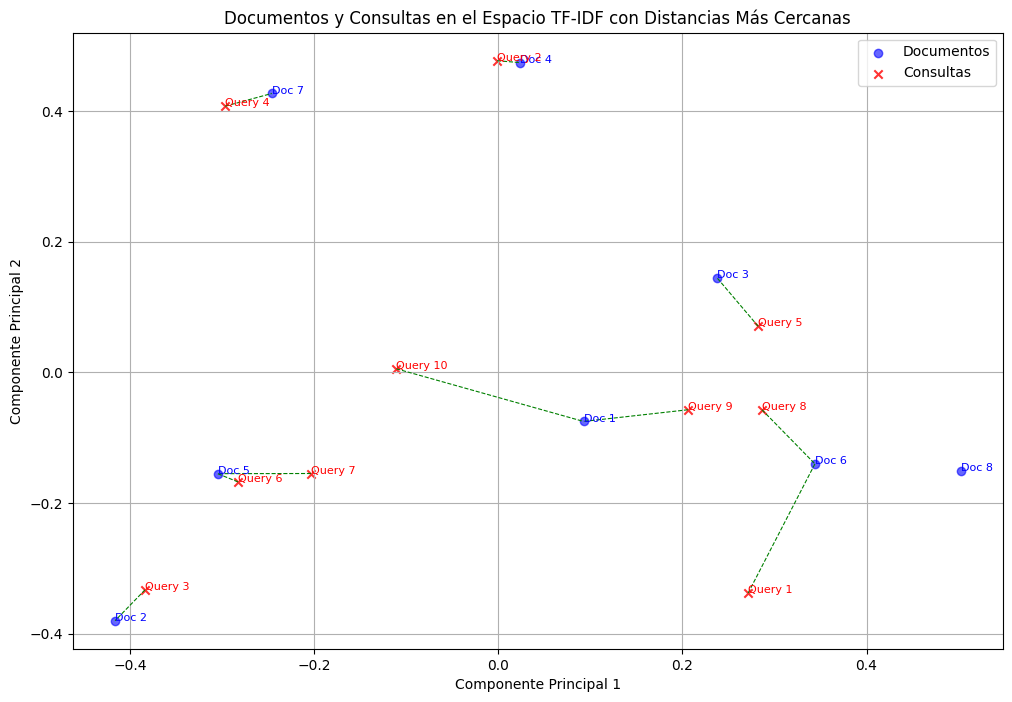

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Concatenar los documentos preprocesados y las consultas preprocesadas
all_texts = documentos + consultas  # Documentos y consultas previamente preprocesados

# Crear una matriz TF-IDF para los textos combinados (documentos y consultas)
vectorizer = TfidfVectorizer(vocabulary=vocab_filtrado)  # Usar el vocabulario filtrado que ya tenemos
all_tfidf_matrix = vectorizer.fit_transform(all_texts)

# Reducir la matriz TF-IDF a 2 dimensiones usando PCA para visualización
pca = PCA(n_components=2)
tfidf_2d = pca.fit_transform(all_tfidf_matrix.toarray())

# Separar las coordenadas de los documentos y de las consultas
doc_coords = tfidf_2d[:len(documentos)]  # Coordenadas de los documentos
query_coords = tfidf_2d[len(documentos):]  # Coordenadas de las consultas

# Crear el gráfico de dispersión para los documentos y las consultas
plt.figure(figsize=(12, 8))

# Graficar los documentos
plt.scatter(doc_coords[:, 0], doc_coords[:, 1], color='blue', alpha=0.6, label="Documentos")

# Graficar las consultas
plt.scatter(query_coords[:, 0], query_coords[:, 1], color='red', alpha=0.8, marker='x', label="Consultas")

# Etiquetas de los documentos
for i, doc in enumerate(doc_coords):
    plt.text(doc[0], doc[1], f'Doc {i+1}', fontsize=8, color="blue")

# Etiquetas de las consultas
for j, query in enumerate(query_coords):
    plt.text(query[0], query[1], f'Query {j+1}', fontsize=8, color="red")

# Calcular y dibujar la distancia más cercana entre cada consulta y los documentos
for j, query in enumerate(query_coords):
    # Calcular distancias entre la consulta y todos los documentos usando la distancia euclidiana
    distances = cdist([query], doc_coords, metric='euclidean')[0]
    closest_doc_index = np.argmin(distances)  # Documento más cercano
    closest_doc_coords = doc_coords[closest_doc_index]

    # Dibujar una línea hacia el documento más cercano
    plt.plot([query[0], closest_doc_coords[0]], [query[1], closest_doc_coords[1]], color='green', linestyle="--", linewidth=0.8)

# Personalización del gráfico
plt.title("Documentos y Consultas en el Espacio TF-IDF con Distancias Más Cercanas")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid(True)
plt.show()